In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시


# 1번 문제

In [9]:
'''
1번.df_first 데이터 프레임 변수에 저장,heatmap을 그리기 
시각화 그래프 한글설정
scv load
데이터프레임 결측치확인
set_index
heatmap 시각화 
'''
# 1-1/1-2 한글설정, scv load
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = "retina"

df_first = pd.read_csv('C:/ai_x/download/ShareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', 
                       encoding='cp949')

In [13]:
pd.options.display.max_columns = 22
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [18]:
# 1-3데이터프레임 결측치확인
# df_first.shape
# df_first.info()
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [26]:
#1-4 set_index
# df_first.set_index('지역', inplace=True)
df_first.head(2)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


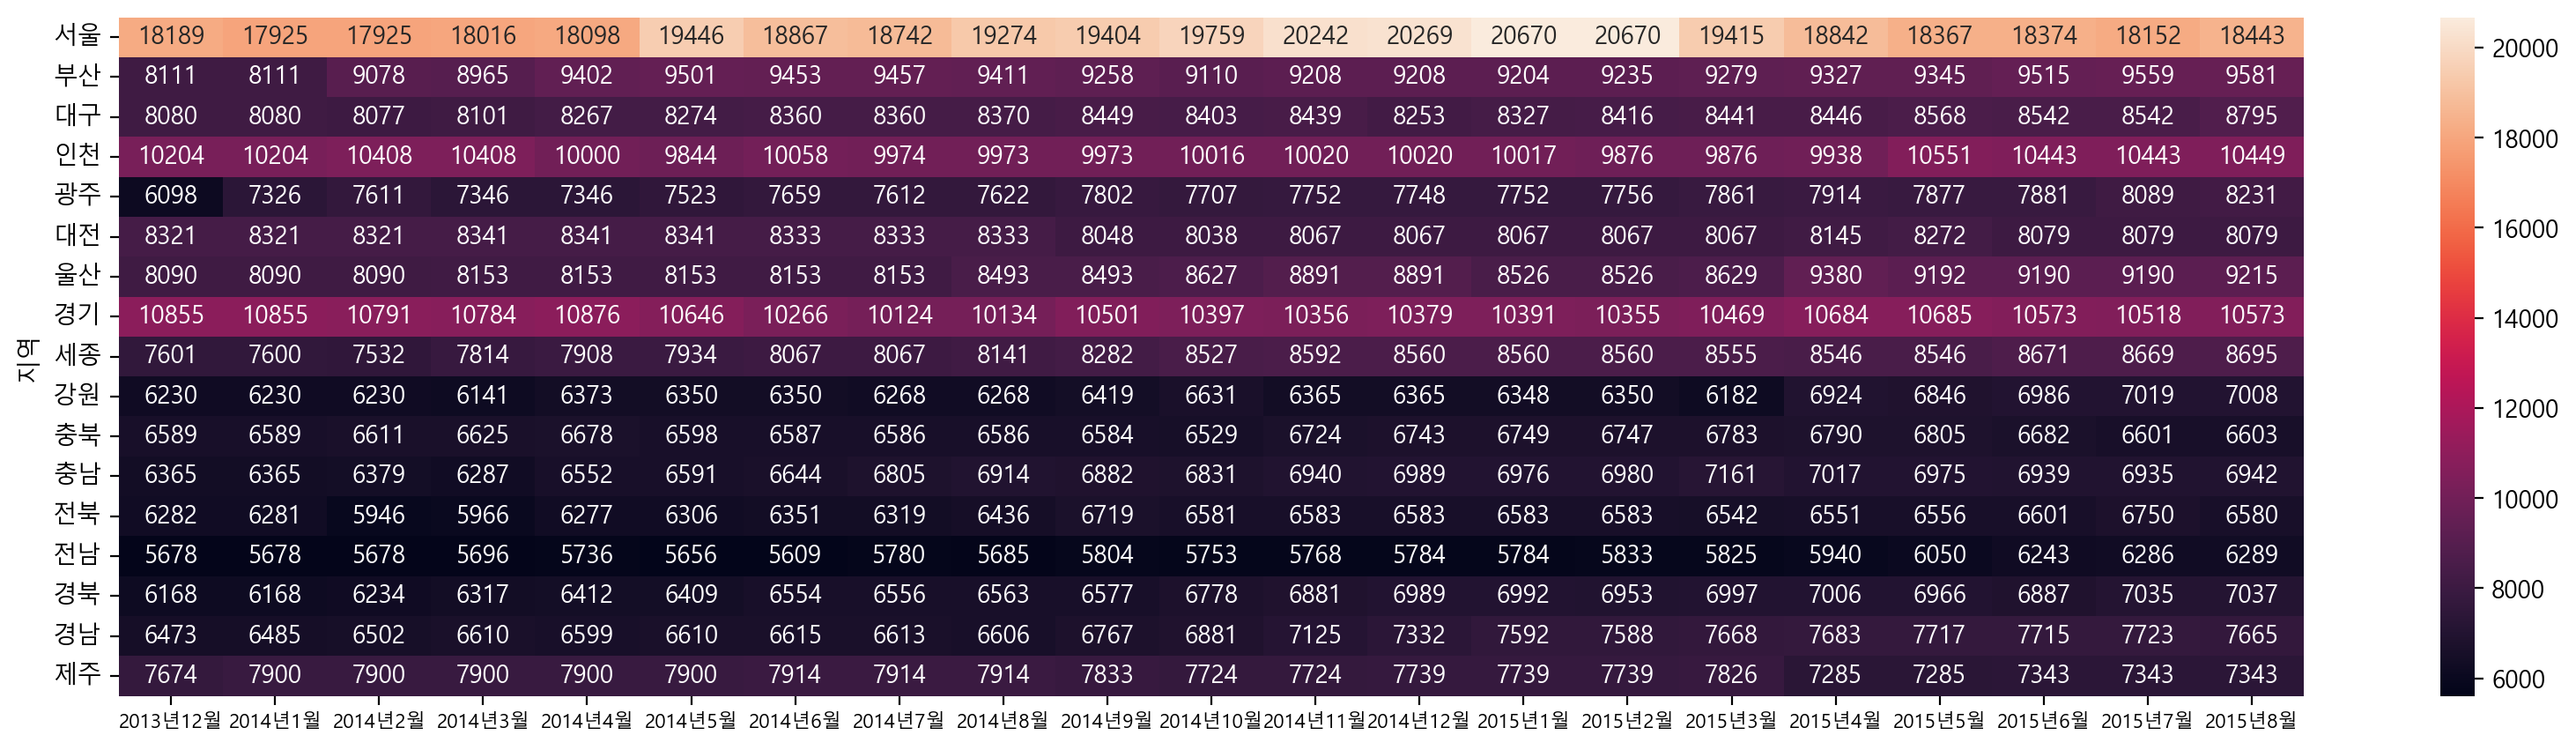

In [38]:
plt.figure(figsize=(20,5))
sns.heatmap(df_first, annot=True, fmt='d')
plt.xticks(rotation=0, fontsize=8)
plt.show()

# 2번 문제

In [41]:
'''
2번.df_last 데이터 프레임 변수에 저장,'평당분양가격'컬럼 추가  
csv load
함수정의 
apply나 map 적용
평당분양가격 컬럼 추가
'''

df_last = pd.read_csv('C:/ai_x/download/ShareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', 
            encoding='cp949')

In [43]:
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [46]:
# df_last['분양가격(제곱미터)'].isna().sum()

pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce').isna().sum() 

740

In [62]:
d2 = df_last.copy()

In [67]:
def new_col(row):
    pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price):  
        row['제곱미터분양가격'] = np.nan
    elif price.strip() == '':  
        row['제곱미터분양가격'] = np.nan
    else:
        row['제곱미터분양가격'] = price
    return row

In [74]:
d2 = d2.apply(new_col, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
0,서울,모든면적,2015,10,5841,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652


In [79]:
d2['제곱미터분양가격'] = d2['제곱미터분양가격'].astype(np.float64)
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


In [80]:
d2['평당분양가격'] = d2['제곱미터분양가격']*3.3
d2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [84]:
d2.drop(['분양가격(제곱미터)','제곱미터분양가격'],axis=1, inplace=True)

In [96]:
d2['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                    .str.replace('제곱미터','㎡')\
                    .str.replace('초과','~')\
                    .str.replace('이하','').str.replace(' ','')
d2

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,모든면적,2015,10,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,18651.6,60㎡
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19410.6,60㎡~85㎡
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.3,85㎡~102㎡
4,서울,전용면적 102제곱미터초과,2015,10,19400.7,102㎡~
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9,모든면적
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,60㎡
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,24799.5,60㎡~85㎡
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,85㎡~102㎡


In [100]:
d2.drop('규모구분',axis=1, inplace=True)

In [107]:
d2.columns

Index(['지역명', '연도', '월', '평당분양가격', '전용면적'], dtype='object')

In [116]:
df_last = d2[['지역명', '전용면적', '연도', '월','평당분양가격']]

In [117]:
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60㎡,2024,8,NaN
9092,제주,60㎡~85㎡,2024,8,24799.5
9093,제주,85㎡~102㎡,2024,8,NaN


# 3번 문제

In [125]:
'''
df_last데이터프레임의 연도별, 지역명별 평당분양가격을 다음과 같이 집계하시오
groupby나 pivot_table 사용, 2차원 인덱스를 변경
'''
# 1.groupby나 pivot_table 사용
df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격', aggfunc='mean')



지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


# 4번 